In [57]:
%matplotlib inline

import matplotlib
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [3]:
binary_array = np.fromfile("test/inline", dtype=np.uint8)

In [4]:
text_array = np.fromfile("test/__text", dtype=np.uint8)

In [5]:
arg_noreturn = np.fromfile("test/text_symbols/_arg_noreturn", dtype=np.uint8)
arg_return = np.fromfile("test/text_symbols/_arg_return", dtype=np.uint8)
noarg_noreturn = np.fromfile("test/text_symbols/_noarg_noreturn", dtype=np.uint8)
noarg_return = np.fromfile("test/text_symbols/_noarg_return", dtype=np.uint8)

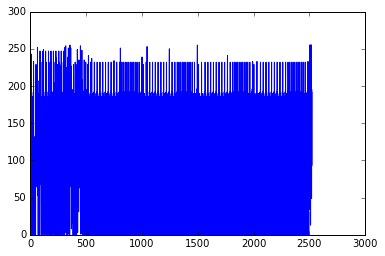

In [6]:
plt.plot(text_array)

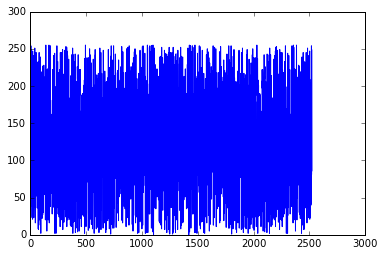

In [7]:
# autocorrelation
result = np.correlate(text_array, text_array, mode="same")
plt.plot(result)

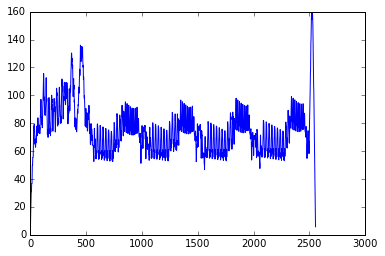

In [76]:
VAR = noarg_noreturn
#LOWER = 1500
#UPPER = 1997
#shift = len(VAR) // 2
result = signal.correlate(text_array, np.ones(len(VAR)), mode="full") / len(VAR)
#result = result[result.size//2:]
#result = result[LOWER + shift: UPPER + shift]
plt.plot(result)

This is kinda weird..., by correlating the text_array with ones() [1,1,1,1,1,1....] I can clearly see the pattern of 4 use[1-4] calls. Their position is correct, and they look very similar...

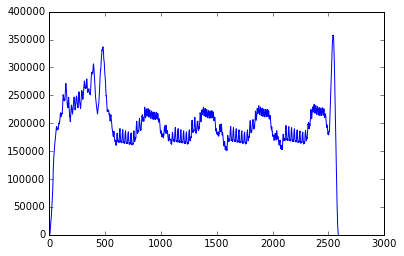

In [77]:
result_2nd = signal.correlate(result, VAR, mode="full")
plt.plot(result_2nd)